## Задача 2 “Преобразование Фурье” (6 баллов)

Во всех функциях разница от оригинала видна сразу же (при убирании даже одной точки)

In [211]:
from math import sin, cos, pi, log, ceil
from matplotlib import pyplot as plt

In [218]:
# function to plot sequence of (x, y) graphs, one one string, with provided description string
def plot_seq(values, title=None):
    plt.figure(figsize=(8, 4))
    plt.xlabel("x")
    plt.ylabel("y")
    if title:
        plt.title(title)
    figs = [plt.scatter(*zip(*data), s=10)  for data, descr in values]
    plt.figlegend(figs, ([descr for data, descr in values]))
    plt.show()

In [219]:
# body for fft and reverse fft, if backward = True it is reversed one
# O(nlogn) complexity becouse of divide and conquer strategy
def fft_iter(values, backward=False):
    #smallest case for recursion
    if len(values) <= 1: 
        return values
    # odd coefficients and even ones
    odd = fft_iter(values[0::2], backward) 
    even = fft_iter(values[1::2], backward)
    # angle = -angle for backward interpolation, and variables for fft are defined
    angle = 2 * pi / len(values) * (-1) ** backward 
    rotate = complex(cos(angle), sin(angle))
    w = complex(1, 0)
    # main cycle
    result = [complex(0, 0)] * len(values)
    for i in range(len(values) // 2):
        result[i] = odd[i] + w * even[i]
        result[i + len(values) // 2] = odd[i] - w * even[i]
        w *= rotate
    # for interpolation only
    if backward:
        result = [a / 2 for a in result]
    return result

# function to extend array with zeros to nearest power of two
def extend_with_zero(values):
    return values + [0] * (2 ** (ceil(log(len(values), 2))) - len(values))

In [220]:
# definitions of fft and reversed fft
def fft(values):
    return fft_iter(extend_with_zero(values)) 

def reverse_fft(values):
    return fft_iter(extend_with_zero(values), backward=True)

In [221]:
# function to use fft-reversed fft to interpolate function on segment [left, right] with discrete=100 ammount of points
# also it could remove last_coeffs=0 ammount of fft last coefficients
def interpolate_function(f, last_coeffs=0, left=0, right=10, discrete=100):
    space = [left + i / discrete * (right - left) for i in range(discrete)]
    g = fft(list(f(a) for a in space))
    f2 = [a.real for a in reverse_fft(g[:(len(g) - last_coeffs)])[:discrete]]
    return [list(zip(space, f2)), "removed {}".format(last_coeffs)]

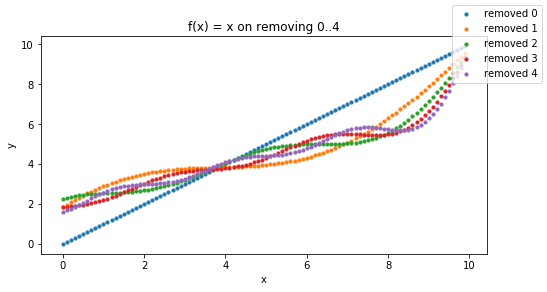

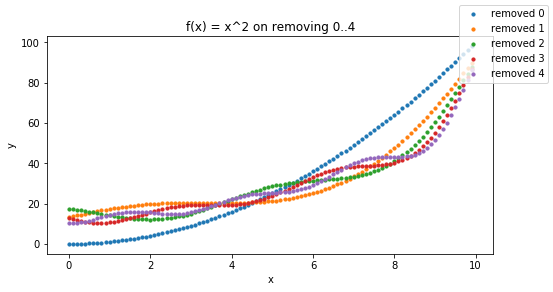

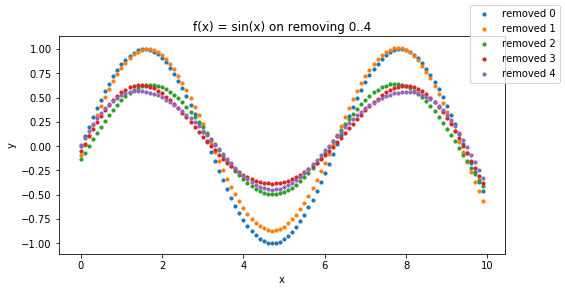

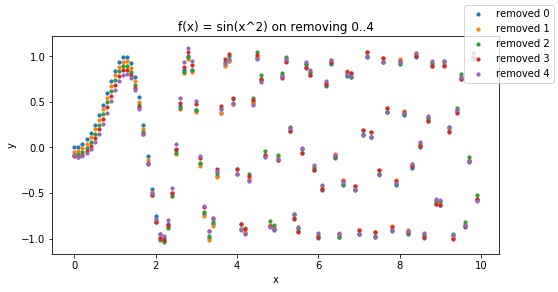

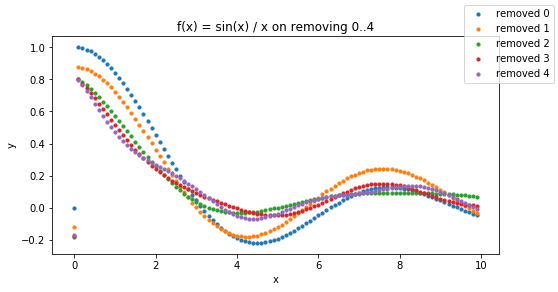

In [222]:
plot_seq([interpolate_function(lambda x: x, a) for a in range(5)], "f(x) = x on removing 0..4")
plot_seq([interpolate_function(lambda x: x ** 2, a) for a in range(5)], "f(x) = x^2 on removing 0..4")
plot_seq([interpolate_function(lambda x: sin(x), a) for a in range(5)], "f(x) = sin(x) on removing 0..4")
plot_seq([interpolate_function(lambda x: sin(x ** 2), a) for a in range(5)], "f(x) = sin(x^2) on removing 0..4")
plot_seq([interpolate_function(lambda x: sin(x) / (x + 0.00001), a) for a in range(5)], "f(x) = sin(x) / x on removing 0..4")